In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/Dataset_Admission_Predict - Dataset_Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [4]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [5]:
(df==0).sum()

,0
SerialNo.,0
GREScore,0
TOEFLScore,0
UniversityRating,0
SOP,0
LOR,0
CGPA,0
Research,181
ChanceofAdmit,0


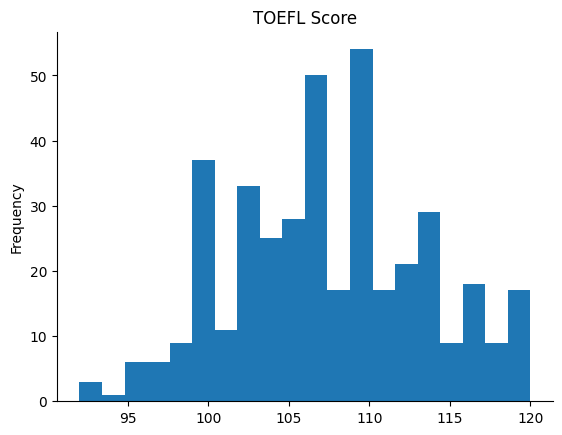

In [6]:
df['TOEFLScore'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [8]:
X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

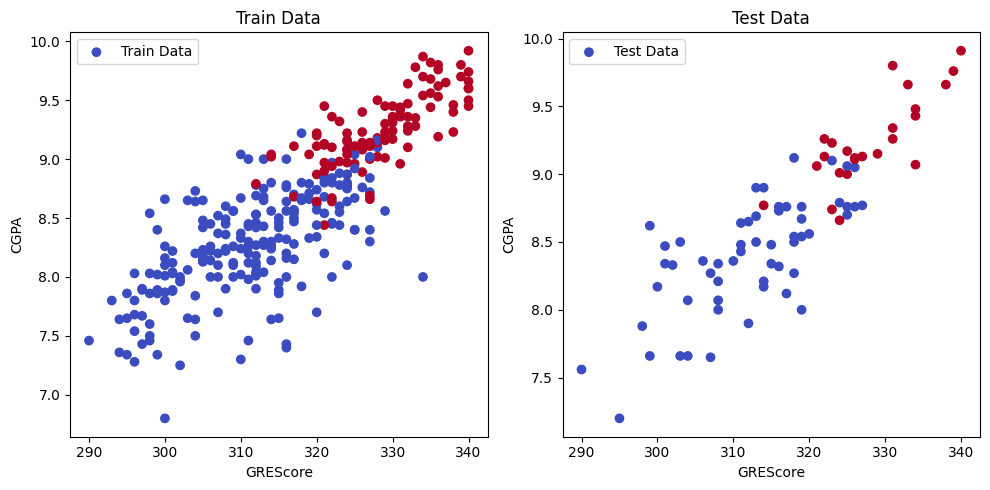

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train['GREScore'], X_train['CGPA'], c=y_train, cmap='coolwarm', marker='o', label='Train Data')
plt.xlabel('GREScore')
plt.ylabel('CGPA')
plt.title('Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['GREScore'], X_test['CGPA'], c=y_test, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('GREScore')
plt.ylabel('CGPA')
plt.title('Test Data')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

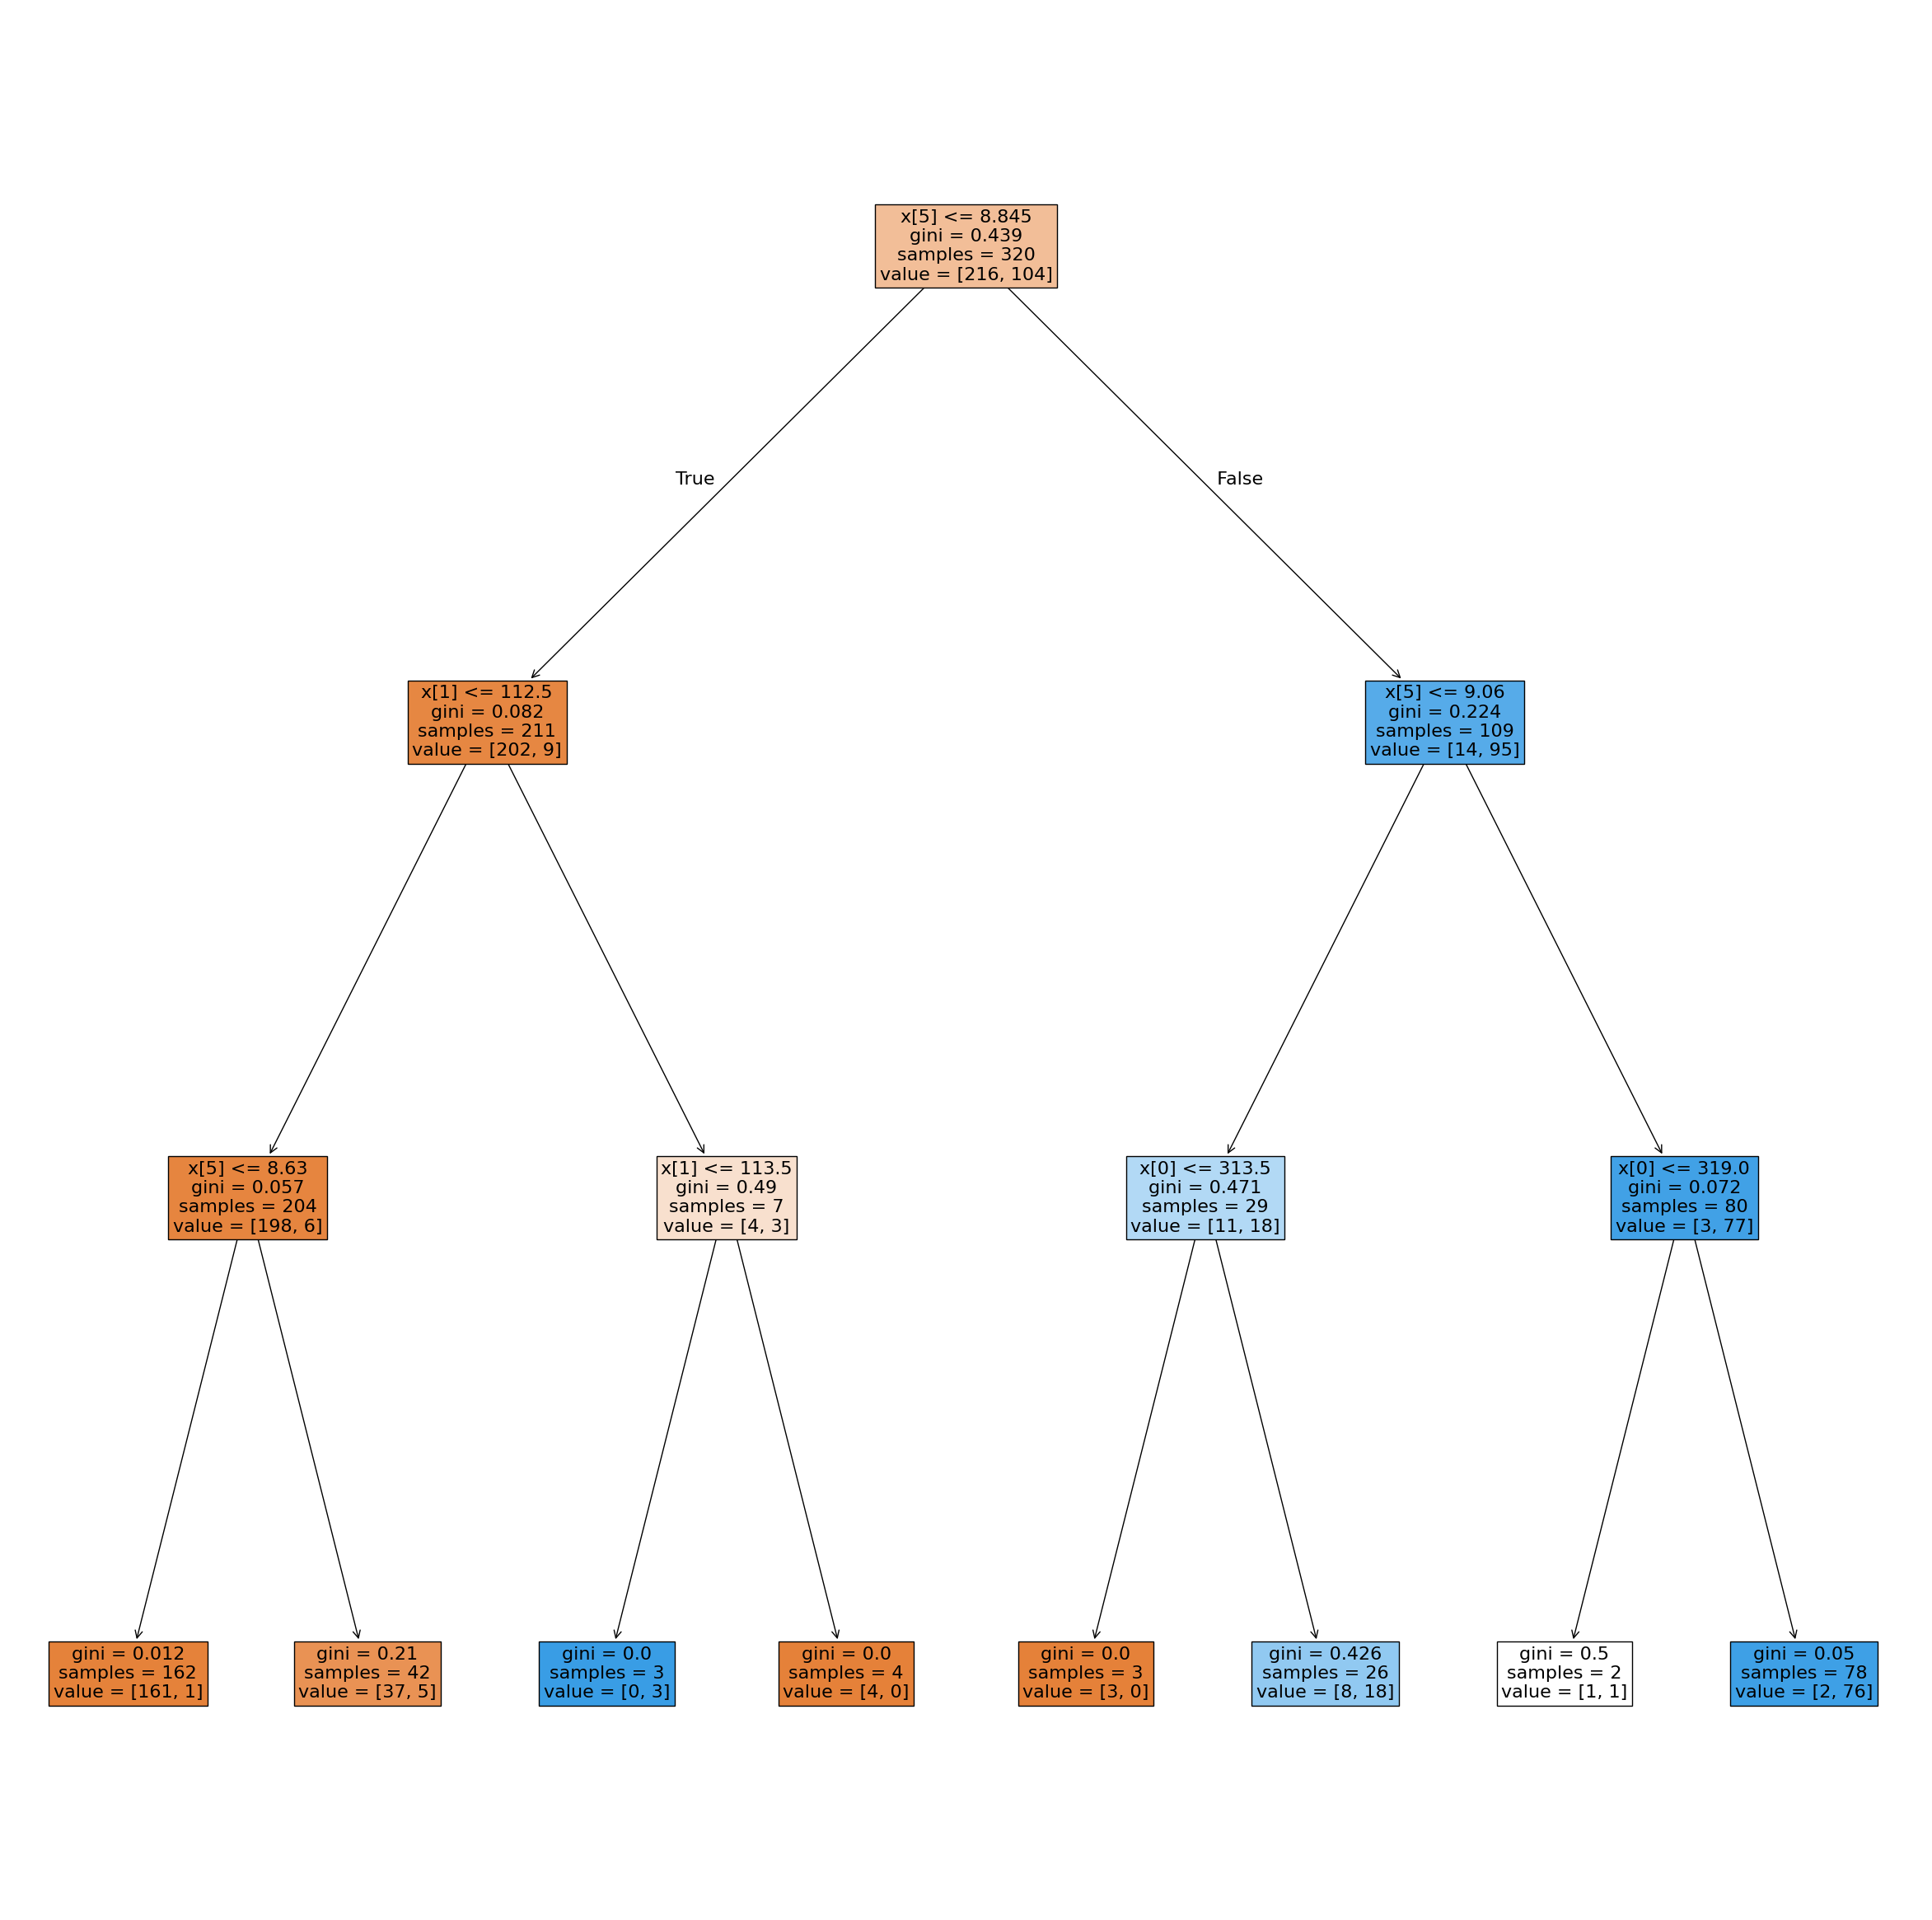

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()

In [15]:
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[51  5]
 [ 3 21]]


In [16]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.9
2. Precision Score: 0.8076923076923077
3. Recall Score: 0.875
4. f1 Score: 0.84


In [17]:
print(y_test)

139    0.0
247    0.0
377    0.0
122    0.0
17     0.0
      ... 
267    0.0
199    0.0
392    1.0
341    0.0
260    1.0
Name: ChanceofAdmit, Length: 80, dtype: float64
